<a href="https://colab.research.google.com/github/hridog00/RealOrNot/blob/master/TFM_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install geotext

     |████████████████████████████████| 2.0MB 3.5MB/s 


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [0]:

###################################################################################################
BASE_FOLDER = "/content/drive/My Drive/TFM/"
###################################################################################################


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Carga y exploracion inciacial de los datos
Leo los datos

In [0]:
train_df = pd.read_csv(BASE_FOLDER+"/resources/data/train.csv")
test_df = pd.read_csv(BASE_FOLDER+"/resources/data/test.csv")

In [0]:
ej = train_df.sample(5)

[]

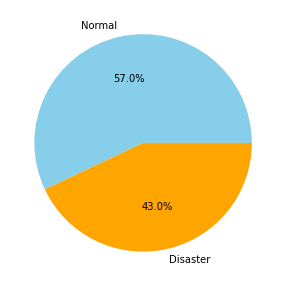

In [6]:
import matplotlib.pyplot as plt
target_values =list(train_df['target'].values)
labels = ['Normal', 'Disaster']
sizes = [target_values.count(0), target_values.count(1)]
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange'] )
plt.title('')
plt.plot()

In [7]:
train_df.sample(5)

,id,keyword,location,text,target
1188,1710,bridge%20collapse,NaN,Mexico: construction of bridge collapse killså...,1
136,196,airplane%20accident,"19.600858, -99.047821",Experts in France begin examining airplane deb...,1
1026,1488,body%20bags,Charlotte NC,The Body Bags has a show on 08/07/2015 at 07:3...,0
4726,6722,lava,Jakarta,@YoungHeroesID Lava Blast &amp; Power Red @die...,0
4750,6758,lightning,"Rapid City, Black Hills, SD",NWS says thunderstorms with deadly lightning w...,1


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


No nos inteneresa la columna id, por lo que la descartamos. Separamos los atributos del target y nos creamos nuestros


In [0]:
X = train_df.drop('id', axis=1)

In [10]:
print('Tweets without natural disaster:',X[X.target == 0].shape[0])
print('Tweets with natural disaster:',X[X.target == 1].shape[0])

Tweets without natural disaster: 4342
Tweets with natural disaster: 3271


## Analisis exploratorio incial

Vemos que esta bastante balanceado el numero de tweets en cada clase. Ahora vamos a conocer el numero de elementos sin valor en cada una de las columnas.

Mising values Keyword: 61
Mising values Location: 2533
Mising values Text: 0


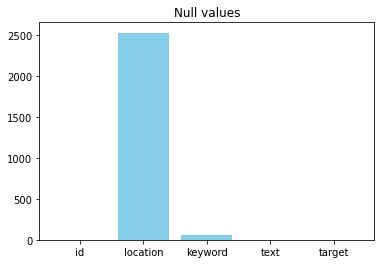

In [0]:
import matplotlib.pyplot as plt

print('Mising values Keyword:',X['keyword'].isnull().sum())
print('Mising values Location:',X['location'].isnull().sum())
print('Mising values Text:',X['text'].isnull().sum())
plt.bar(['id','location', 'keyword', 'text', 'target'],[train_df['id'].isnull().sum(), train_df['location'].isnull().sum(), train_df['keyword'].isnull().sum(), train_df['text'].isnull().sum(), train_df['target'].isnull().sum()], color="skyblue")
plt.title('Null values')
plt.show()

Exploramos el campo ***location***, para conocer su contenido y ver si puede ser relevante.

Me interesa conocer si hay algun patron que indique si hay alguna relacion en el hecho de que se incluya la localizaión o no. Comprobamos que no, ya que en ambos, la proporcion de tweets con ese campo nulo es la misma.

In [0]:
print('Proportion of tweets with null location in real disasters:',X[X['target'] == 1]['location'].isnull().sum()/X[X.target == 1].shape[0])
print('Proportion of tweets with null location in fake disasters:',X[X['target'] == 0]['location'].isnull().sum()/X[X.target == 0].shape[0])

Proportion of tweets with null location in real disasters: 0.32864567410577805
Proportion of tweets with null location in fake disasters: 0.33578995854444954


In [0]:
values_location = set(X.location.values)
print('Different values for location:',len(values_location))

Different values for location: 3342


Vamos a explorar por encima los valores que tiene este campo. Es importante saber que la herramineta Twitter te permite introducir la localización a mano, por lo que no tiene por qué ser el lugar real desde el cual se envió el tweet.

In [0]:
values_location

{nan,
 'Pretoria',
 'Macclesfield',
 'Bombardment Bay',
 'Happily Married with 2 kids ',
 'Bossland',
 'Corpus Christi, Texas',
 'SÌ£o Paulo SP,  Brasil',
 'Calgary',
 'Darlington',
 'North West London',
 'Northampton, MA',
 'Peshawar',
 ' BC, US, Asia or Europe.',
 "Namjoon's pants",
 'pettyville, usa',
 'have car; will travel',
 'justin & ari follow || tvd',
 'Livonia, MI',
 'San Diego, CA',
 'Rochester, NY',
 'Queensland, Australia',
 'Asia',
 'Charleston, WV',
 'Dutch/English/German',
 'Overton NV',
 'Skyport de la Rosa',
 'Tring ',
 'Scotland ',
 'nj',
 'Milwaukee County',
 'fluffy cloud',
 'Here, there and everywhere',
 'WORLDWI$E ',
 'Miami?Gainesville',
 'Queens, NY',
 '#HAMont',
 '[marvel\x89Û¢dragon age\x89Û¢wicdiv]',
 'DaKounty, Pa',
 'The Web',
 'MAD as Hell',
 'Calgary, Canada',
 'Antigua ?? NYC ',
 'Manavadar, Gujarat',
 'Seattle',
 'NOLA ?? TX',
 'Duval, WV 25573, USA ?',
 'El Dorado, Arkansas',
 'Florida Forever',
 'eARth 3',
 'Bangkok Thailand',
 'WESTSIDE OF PHILLY 7?

In [0]:
X[X.target == 0][['location', 'target']].groupby('location').count().sort_values('target',ascending=False).head(10)

,target
location,
New York,55
USA,37
London,29
United States,23
"Los Angeles, CA",18
Canada,16
Kenya,15
Everywhere,12
Florida,11


In [0]:
X[X.target == 1][['location', 'target']].groupby('location').count().sort_values('target',ascending=False).head(10)

,target
location,
USA,67
United States,27
Nigeria,22
India,20
Mumbai,19
UK,16
London,16
New York,16
"Washington, DC",15


Como era previsible, encontramos algunas localizaciones como 'A Hoop Somewhere', 'On the Court' o 'Earth'. Estos ejemplos indican que el valor de este campo no es muy relevante y probablemente no deba ser incluido como una caracteristica en el modelo.

**IDEA**: Puede que sera interesante buscar una libreria con localizaciones y comprobar en que tweets la localiazion corresponde con un lugar real. Es posible que si se esta escribiendo un tweet sobre una catastrofe y se incluye la localizacion, esta corresponda con un lugar real. Se podria generar entonces una nueva caracteristica que sustituyera a Location que simplemente si incluye una localizacion real. A tener en cuenta.


Exploramos el campo ***keyword***, para conocer su contenido y ver si puede ser relevante. En este caso, me resulta de especial interes conocer el numero de ocasiones en la que un keyword aparece en tweets reales y en tweets fakes.

In [0]:
values_keyword = set(X.keyword.values)
print('Different values for keywords:',len(values_keyword))

Different values for keywords: 222


In [0]:
target_colums = pd.get_dummies(X.target)
X_dummies = pd.DataFrame()
X_dummies['keyword'] = X['keyword']
X_dummies['real'] = target_colums[1]
X_dummies['fake'] = target_colums[0]
keyword_count = X_dummies[['real', 'fake','keyword']].groupby('keyword').sum()

In [0]:
keyword_count.sort_values(by=['real', 'fake'],ascending=False)

,real,fake
keyword,,
outbreak,39,1
derailment,39,0
wreckage,39,0
oil%20spill,37,1
typhoon,37,1
...,...,...
blazing,1,33
body%20bag,1,32
electrocute,1,31


In [0]:
keyword_count[keyword_count.index == 'harm']

,real,fake
keyword,,
harm,4,37


In [0]:
print('Proportion of tweets with null keyword in real disasters:',X[X['target'] == 1]['keyword'].isnull().sum()/X[X.target == 1].shape[0])
print('Proportion of tweets with null keyword in fake disasters:',X[X['target'] == 0]['keyword'].isnull().sum()/X[X.target == 0].shape[0])

Proportion of tweets with null keyword in real disasters: 0.012840110058086213
Proportion of tweets with null keyword in fake disasters: 0.004375863657300783


In [0]:
X[X.target == 0][['keyword', 'target']].groupby('keyword').count().sort_values('target',ascending=False).head(10)

,target
keyword,
body%20bags,40
harm,37
armageddon,37
wrecked,36
ruin,36
deluge,36
explode,35
twister,35
fear,35


In [0]:
X[X.target == 1][['keyword', 'target']].groupby('keyword').count().sort_values('target',ascending=False).head(10)

,target
keyword,
derailment,39
wreckage,39
outbreak,39
debris,37
oil%20spill,37
typhoon,37
evacuated,32
suicide%20bombing,32
rescuers,32


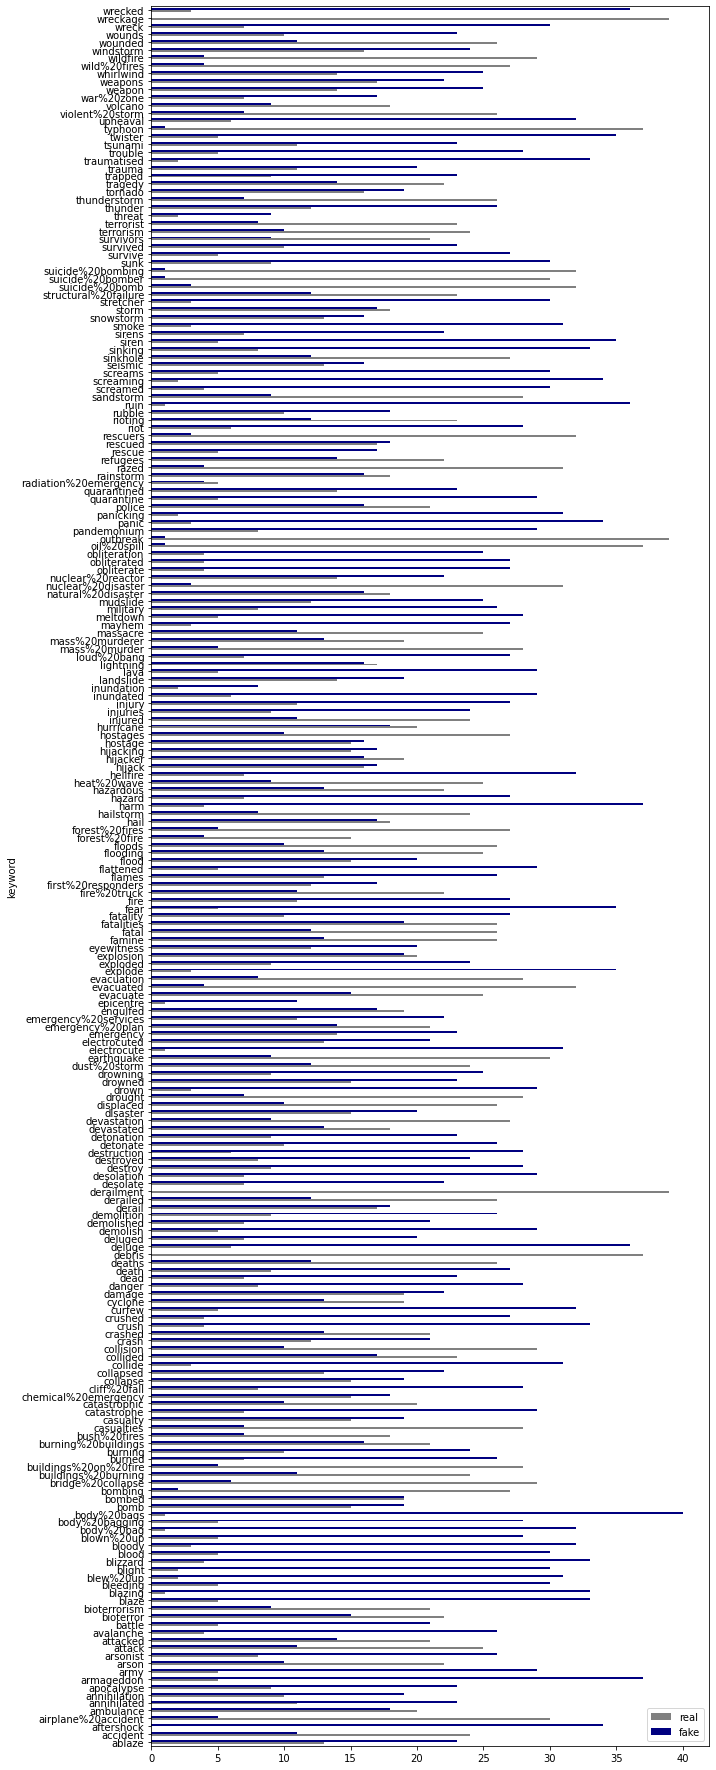

In [0]:
keyword_count.plot(kind= 'barh', figsize= (10,32), legend = True ,color=['grey', 'navy'])

En este grafico si que observamos que en los que se refiere a las keyword, si que que encontramos diferencia entre los tweets reales y los fake. Por lo tanto, si consideramos que esta es una caracteristica relevante a tener en cuenta.

### Obtencion de caracteristicas

En lo que se refiere al texto, tenemos que definir que características de este van a ser analizadas. Hay diferentes aspectos que pueden ser tenidos en cuenta:
- Numero de palabras.
- Numero de caracteres.
- % de !
- % de ?
- % de '
- % de mayusculas.
- % de numeros.
- Uso de hastags
- Uso de @ (para menciones)
- Numero de urls
- Que incluya un lugar en el texto? (Sin implementar, pero puede que interesante de explorar)

Una vez hayamos obtenidos estas caracteristicas, podemos buscar patrones para comprobar si hay relación entre ellas y la clasificación del tweet.


In [0]:
a ='ahs 12 s5'
for i in a:
    if i.isalpha():
        print(i)

a
h
s
s


In [0]:
def get_words(text):
    return len(text.split(' '))

def get_characters(text):
    return len(text)

def get_exclamations(text):
    return text.count('!')

def get_interrogations(text):
    return text.count('?')

def get_upper(text):
    n = sum([1 for t in text if t.isalpha()])
    return sum([1 for t in text if t.isupper()])/n

def get_number(text):
    return sum([1 for t in text.split(' ') if t.isnumeric()])/len(text.split(' '))

def get_hastag(text):
    return text.count('#')

def get_mentions(text):
    return text.count('@')

def get_urls(text):
    return text.count('http')

def get_unique_words(text):
    return len(set(str(text).split()))


X['words'] = X['text'].apply(get_words)
X['characters'] = X['text'].apply(get_characters)
X['exclamation'] = X['text'].apply(get_exclamations)
X['interrogations'] = X['text'].apply(get_interrogations)
X['upper'] = X['text'].apply(get_upper)
X['number'] = X['text'].apply(get_number)
X['hastag'] = X['text'].apply(get_hastag)
X['mentions'] = X['text'].apply(get_mentions)
X['urls'] = X['text'].apply(get_urls)
X['unique_words'] = X['text'].apply(get_unique_words)

In [0]:
real_df = X[X.target==1]
fake_df = X[X.target==0]

Obtenemos la media de los valores obtenidos todos los tweets fake y real. Calculamos tambien la desviacion tipica para conocer como de fiables son estos valores. Esto nos da una visión a primera vista de si una característica tiene alguna relación con el hecho de que el tweet hable de una catastrofe natural o no.

In [0]:
X.groupby(['target']).mean()

,words,characters,exclamation,interrogations,upper,number,hastag,mentions,urls,unique_words
target,,,,,,,,,,
0,14.723860,95.706817,0.194150,0.544450,0.128360,0.007740,0.391525,0.426992,0.507600,14.096499
1,15.201162,108.113421,0.100887,0.232956,0.133964,0.013198,0.520636,0.276674,0.769795,14.664934


In [0]:
X.groupby(['target']).std()

,words,characters,exclamation,interrogations,upper,number,hastag,mentions,urls,unique_words
target,,,,,,,,,,
0,6.188171,35.885924,0.673542,2.208386,0.152806,0.027223,1.008420,0.775155,0.668378,5.654748
1,5.184417,29.309854,0.534643,1.137959,0.122203,0.033249,1.206805,0.629696,0.628005,4.710934


Observamos los siguientes aspectos:
- Ligeramente superior el numero de caracteres en el caso de los tweets reales, pero no demasiado significativo. lo mismo con el numero de palabras.
- Menor numero de signos de puntuación (exclamacion, interrogación, comillas) en los tweets reales. Destaca sobre todo en el caso de los signos de interrogacion.
- Mayor uso de mayusculas en los tweets reales, tampoco demasiado significativo
- En los tweet reales hay una mayor presencia de números respecto a los tweet fakes.
- Mayor número de hastags y menos número de menciones

Estas observaciones no son suficientes para indicar si la inclusión de las características analizadas va a ayudar al entrenamiento del modelo. Para ello, se utilizará alguna téncinca de selcción de atributos, como *VarianceThreshold*.

 Podria ser interesante para ver de manera ms visual los resultados obtenidos

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


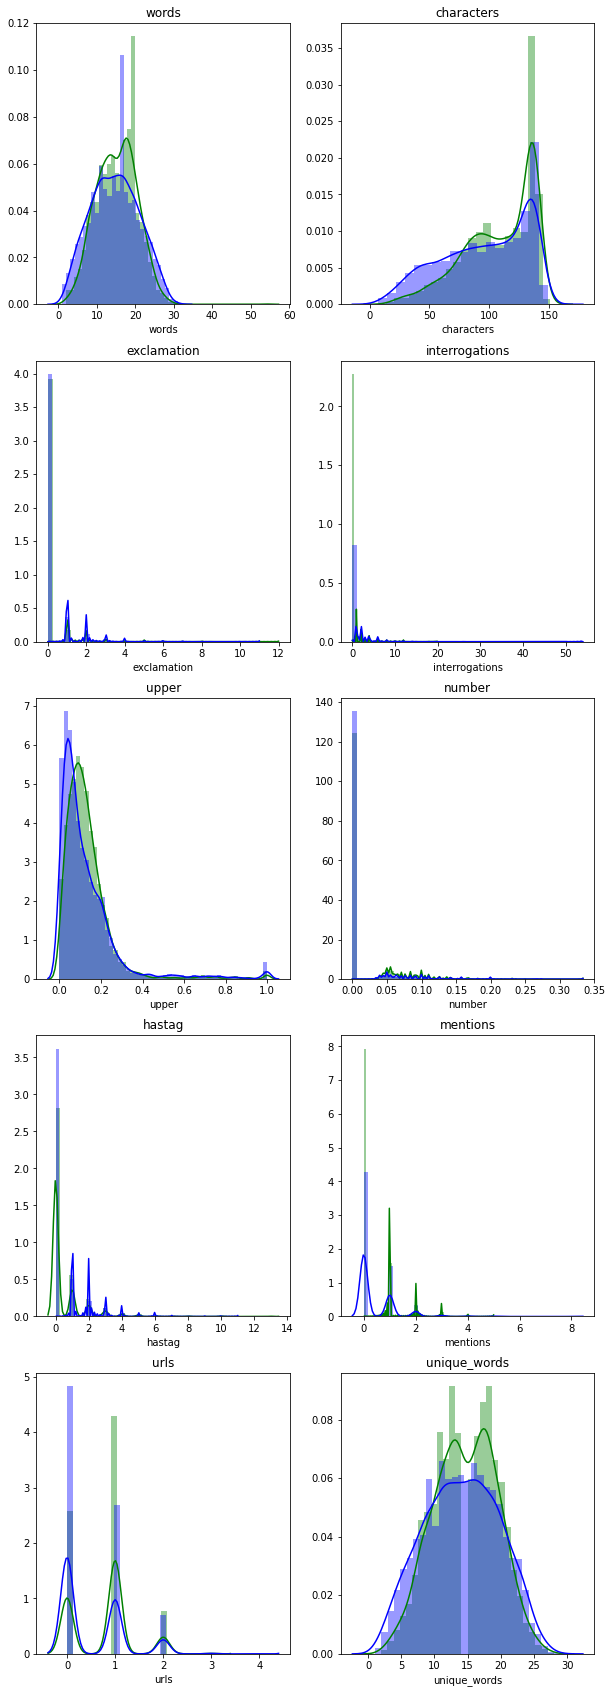

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

features =list( X.columns)
features = [f for f in features if f not in ['keyword', 'location', 'target', 'text']]
fig, axes = plt.subplots(ncols=2, nrows = 5, figsize=(10, 30))
i = 0
j = 0
for feature in features:
    sns.distplot(X[X.target==1][feature], color='green', ax= axes[i][j],   label='real')
    sns.distplot(X[X.target==0][feature], color='blue', ax = axes[i][j],  label='fake')
    axes[i][j].set_title(feature)
    if j%2 ==0:
        j+=1
        
    else:
        j=0
        i+=1

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0


IndexError: ignored

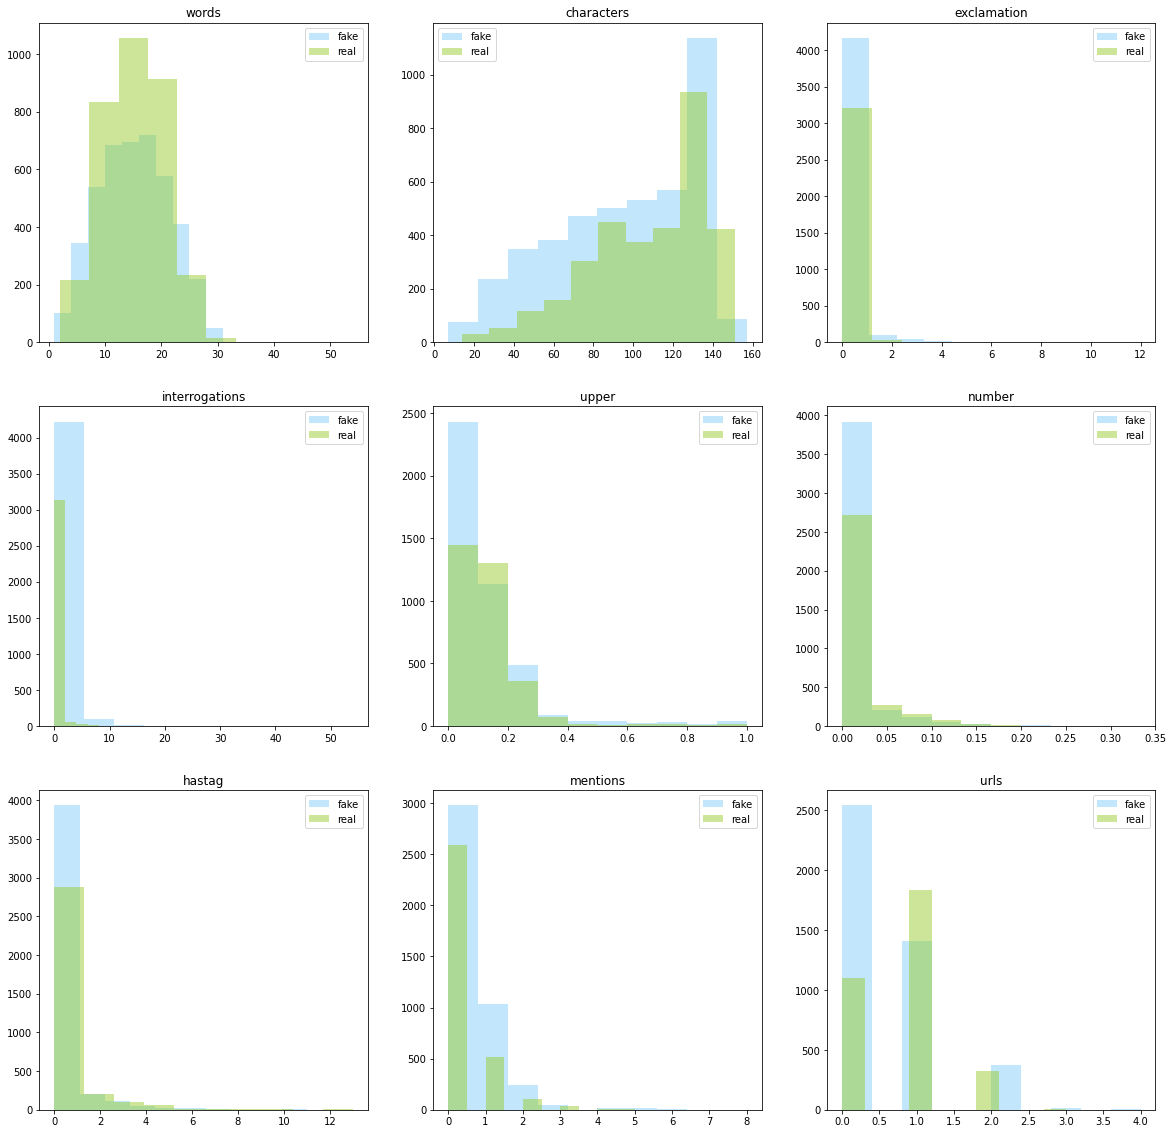

In [0]:
import matplotlib.pyplot as plt

features =list( X.columns)
features = [f for f in features if f not in ['keyword', 'location', 'target', 'text']]
fig, axes = plt.subplots(ncols=3, nrows = 3, figsize=(20, 20))
i = 0
j = 0

for feature in features:
    print(i,j)
    axes[i][j].hist(X[X.target==0][feature], color='lightskyblue', label='fake',alpha=0.5)
    axes[i][j].hist(X[X.target==1][feature], color='yellowgreen',  label='real',alpha=0.5)
    axes[i][j].set_title(feature)
    axes[i][j].legend()
    if j !=2:
        j+=1
        
    else:
        j=0
        i+=1



In [0]:
import re
def hastag_text(txt):
    re_hastag = '#\w+'
    x = re.findall(re_hastag, txt)
    return x


hastags_list_real = X[X.target == 1].text.apply(hastag_text).values
hastags_real = []
for l in hastags_list_real:
    for h in l:
        hastags_real.append(h)

hastags_list_fake = X[X.target==0].text.apply(hastag_text).values
hastags_fake = []
for l in hastags_list_fake:
    for h in l:
        hastags_fake.append(h)

In [0]:
hastags = set(hastags_real + hastags_fake)
len(hastags)


2087

In [0]:
from collections import Counter
hastags_counter_real = Counter(hastags_real)
hastags_counter_real.most_common(20)
pd.DataFrame.from_dict(hastags_counter_real, orient='index').sort_values(by=0, ascending=False).head(20)

,0
#News,33
#news,23
#Hiroshima,21
#prebreak,13
#best,13
#hot,13
#India,10
#Japan,10
#yyc,10
#Sismo,9


In [0]:
from collections import Counter
hastags_counter_fake = Counter(hastags_fake)
pd.DataFrame.from_dict(hastags_counter_fake, orient='index').sort_values(by=0, ascending=False).head(20)

,0
#hot,18
#prebreak,17
#best,17
#news,15
#GBBO,13
#islam,11
#NowPlaying,10
#nowplaying,10
#jobs,9
#Directioners,8


### Limpieza inicial
Sabemos que son tweets, por lo tanto puede que tengan menciones y enlaces que no aportan conocimiento. vamos a deshacernos de ellos

In [0]:
import re
def clean_mentions(txt):
    x = re.sub("@\w*", "", txt)
    return x

def remove_links(text):
    print(text)
    text = re.sub(r"http\S+", "", text)
    return text

remove_links("'Listen to this hit song. A summer Bomb full of positive energy and youth\nDid you like it?\nhttps://t.co/2LiWkJybE9 \n#Norge2040'")

'Listen to this hit song. A summer Bomb full of positive energy and youth
Did you like it?
https://t.co/2LiWkJybE9 
#Norge2040'


"'Listen to this hit song. A summer Bomb full of positive energy and youth\nDid you like it?\n \n#Norge2040'"

### Obtencion de conocimiento
A continuacion, vamos a explorar en mayor profundidad el contenido del campo texto. Vamos a buscar las palabras mas repetidas

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.tokenize import word_tokenize

def get_words(text):
    return word_tokenize(text)

In [0]:
real = X[X.target==1]['text'].apply(get_words).values
disaster_words = [w.lower() for p in real for w in p]
fake = X[X.target==0]['text'].apply(get_words).values
non_disaster_words = [w.lower() for p in fake for w in p]

In [0]:
from collections import Counter
real_counter = Counter(disaster_words)
fake_counter = Counter(non_disaster_words)

In [0]:
print('Real:',real_counter.most_common(10))
print('Fake:',fake_counter.most_common(10))

Real: [(':', 3676), ('http', 2380), ('#', 1703), ('the', 1345), ('in', 1159), ('.', 1106), ('a', 924), ('of', 920), ('@', 905), ('?', 762)]
Fake: [(':', 3030), ('?', 2364), ('http', 1927), ('.', 1907), ('the', 1887), ('@', 1854), ('#', 1700), ('i', 1344), ('a', 1248), ('to', 1187)]


Vemos que las palabras que mas se usan no son representativas: esto se debe a que no se hizo previamente una limpieza de los datos, realmente importante. Debemos eliminar antes las denominadas *stop words*. Esto podemos hacerlo a mano, pero creo que podría ser útil utilizar la herramienta NTLK.

En primer lugar, eliminamos lo elementos de puntuacion

In [0]:
import string
table = str.maketrans('', '', string.punctuation)
disaster_words_stripped = [w.translate(table) for w in disaster_words]
non_disaster_words_stripped = [w.translate(table) for w in non_disaster_words]

Eliminamos todos aquellos elementos que no sean alphanumericos (Quiza habria que mantener los hastag?)

In [0]:
disaster_words_alpha = [w for w in disaster_words_stripped if w.isalpha()]
non_disaster_words_alpha = [w for w in non_disaster_words_stripped if w.isalpha()]

Eliminamos los stop words. Tras ver los resultados, he creido conveniente incluir las siguientes palabras

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('would')
stop_words.append('http')
stop_words.append('https')
stop_words.append('nt')

real_words = [w for w in disaster_words_alpha if not w in stop_words]
fake_words = [w for w in non_disaster_words_alpha if not w in stop_words]

In [0]:
from collections import Counter
clean_real_counter = Counter(real_words)
clean_fake_counter = Counter(fake_words)
print('Real:',clean_real_counter.most_common(10))
print('Fake:', clean_fake_counter.most_common(10))

Real: [('fire', 180), ('news', 140), ('amp', 135), ('via', 121), ('disaster', 119), ('california', 115), ('suicide', 110), ('police', 107), ('people', 105), ('killed', 93)]
Fake: [('like', 253), ('amp', 209), ('new', 168), ('get', 163), ('one', 130), ('body', 113), ('via', 99), ('video', 96), ('people', 95), ('got', 92)]


Convertimos en una misma palabra todas las que tienen la misma raiz ?

In [0]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed_real = [porter.stem(word) for word in real_words]
stemmed_fake = [porter.stem(word) for word in fake_words]

In [0]:
from nltk.stem import SnowballStemmer

sno = SnowballStemmer('english')
stemmed_real = [sno.stem(word) for word in real_words]
stemmed_fake = [sno.stem(word) for word in fake_words]

In [0]:
from collections import Counter
steammed_real_counter = Counter(real_words)
steammed_fake_counter = Counter(fake_words)
print('Real:',steammed_real_counter.most_common(10))
print('Fake', steammed_fake_counter.most_common(10))

Real: [('fire', 180), ('news', 140), ('amp', 135), ('via', 121), ('disaster', 119), ('california', 115), ('suicide', 110), ('police', 107), ('people', 105), ('killed', 93)]
Fake [('like', 253), ('amp', 209), ('new', 168), ('get', 163), ('one', 130), ('body', 113), ('via', 99), ('video', 96), ('people', 95), ('got', 92)]


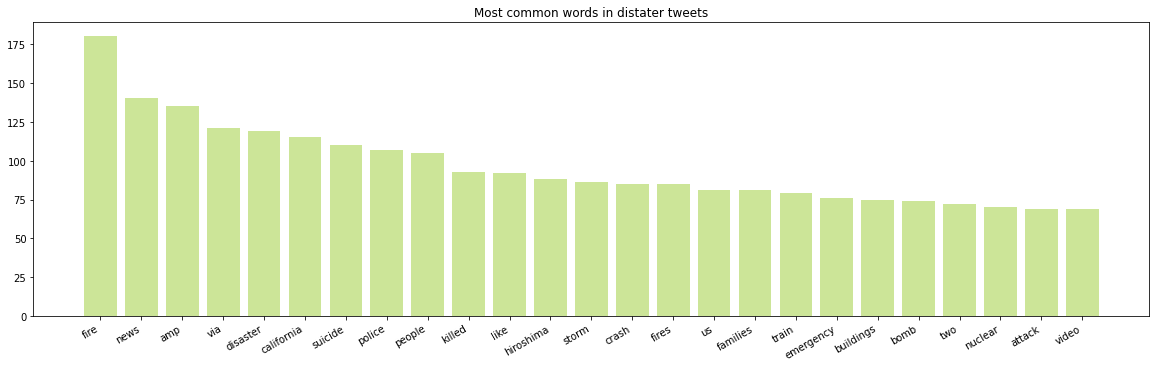

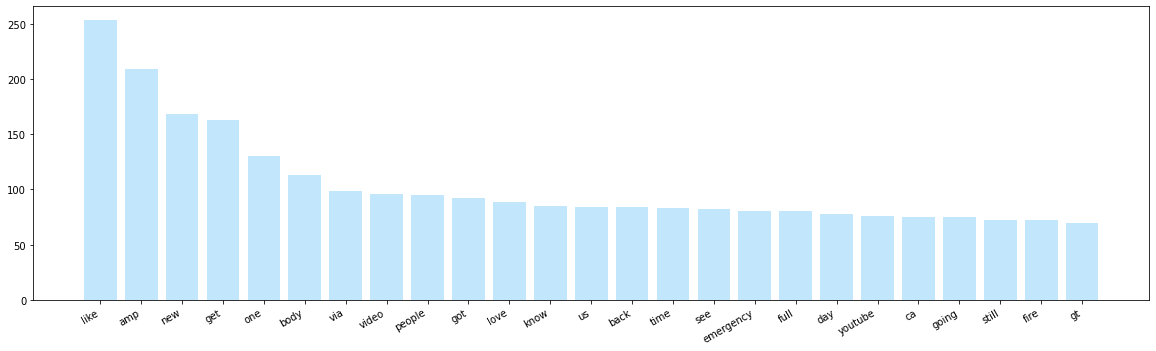

In [0]:
fig, ax = plt.subplots(1, figsize=(20, 6))
words_real, values_real = zip(*steammed_real_counter.most_common(25))

ax.bar(words_real, values_real, color= 'yellowgreen', alpha=0.5)
ax.set_title('Most common words in distater tweets')
ax.set_xticks(words_real)
fig.autofmt_xdate()

fig.show()
fig, ax = plt.subplots(1, figsize=(20, 6))

words_fake, values_fake = zip(*steammed_fake_counter.most_common(25))
ax.bar(words_fake, values_fake, color='lightskyblue', alpha =0.5)
fig.autofmt_xdate()

fig.show()



#### Susituiur localizacion

Una observacion que me resulta interesante es que dentro de las plabaras mas comunes en los disastres naturales, encontramos lugares. Vamos a tratar de identificar los lugares mencionados en los twwets. PAra ello, voy  aprobar distintas librerías, para comprobar cal ofrence mayor exactitud.

Este aspecto, puede ser interesante. Se podría sustituir todas las palabras que indiquen un lugar por una plabra clave (*locationname* o lago asi), de modo que al tokenizar, todas las localizaciones se transformen en un mismo token. He probado varias librerias y todas tienen sus pros y sus contras.

- SpaCy: otra opcion barajada es utilizar la librería SpaCy. Esta identifica las palabras de un texto dado y les asigna una etiqueta. Para las localizaciones utiliza la etiqueta 'GPE'. Es muy lento y además se ha comprobado que tampoco funciona bien.

In [0]:
import spacy #Muy lenta
i=i+1
nlp = spacy.load("en_core_web_sm")

text = X[X.target==1]['text'].iloc[i]
def get_places(text):
    doc = nlp(text)
    places = []
    for ent in doc.ents:
        if(ent.label_ == 'GPE'):
            places.append(ent.text)
    return places
places = X[X.target==1]['text'].apply(get_places)
places = [c for c in places if len(c)>0]
print('% of tweets with places in Real tweets:',len(places)/ X[X.target==1].shape[0])
places = X[X.target==0]['text'].apply(get_places)
places = [c for c in places if len(c)>0]
print('% of tweets with places in Fake tweets:',len(places)/ X[X.target==0].shape[0])

% of tweets with places in Real tweets: 0.27178232956282483
% of tweets with places in Fake tweets: 0.08705665591893137


In [0]:
test = X.iloc[7610]['text']
print(test)
print('Lugares encontrados:',get_places(test))

M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ
Lugares encontrados: []


- Geotext: simple y eficaz, pero solo detecta ciudades y pasies. Regiones como Hawaii no son detectadas.

In [0]:
from geotext import GeoText #solo ciudades y paises

def get_places(text):
    places = GeoText(text)
    return places.cities + places.countries 
places = X[X.target==1]['text'].apply(get_places)
places = [c for c in places if len(c)>0]
print('% of tweets with places in Real tweets:',len(places)/ X[X.target==1].shape[0])
places = X[X.target==0]['text'].apply(get_places)
places = [c for c in places if len(c)>0]
print('% of tweets with places in Fake tweets:',len(places)/ X[X.target==0].shape[0])

% of tweets with places in Real tweets: 0.24151635585447875
% of tweets with places in Fake tweets: 0.08636573007830493


- Mi propio extractor: otra opcion que me plantee fue generar mi propio extractor de lugares a partir de un CSV que contiene todas las principales ciudades del mundo, su pais y su region. El problema surgo en las ciudades compuestes, vease New York. La idea es ir buscando palabra por palabra si se encuentra dentro de la lista obtenida de localizaciones, por lo tanto buscaria por un lado New y por otro lado York.

In [0]:
class PlacesFinder():
    def __init__(self):
        places_list = pd.read_csv(BASE_FOLDER+'resources/data/world-cities_csv.csv')
        self.countries = set(pd.unique(places_list['country']))
        self.cities =  set(pd.unique(places_list['name']))
        self.regions = set(pd.unique(places_list['subcountry']))
    def find_places(self, text):
        places = []
        clean_text = self.clean_text(text)
        for word in clean_text:
            if word in self.countries:
                places.append(word)
            elif word in self.regions:
                places.append(word)
            elif word in self.cities:
                places.append(word)
        return places
    def clean_text(self, text):
        #print(text)
        table = str.maketrans('', '', string.punctuation)
        words_stripped = [w.translate(table) for w in text.split(' ')]
        words_alpha = [w for w in words_stripped if w.isalpha()]
        
        stop_words = stopwords.words('english')
        stop_words.append('would')
        stop_words.append('http')
        stop_words.append('https')
        stop_words.append('nt')
        real_words = [w for w in words_alpha if not w in stop_words]
        return real_words
    

In [0]:
pc = PlacesFinder()
def get_places(text):
    places = pc.find_places(text)
    return places
places = X[X.target==1]['text'].apply(get_places)
places = [c for c in places if len(c)>0]
print('% of tweets with places in Real tweets:',len(places)/ X[X.target==1].shape[0])
places = X[X.target==0]['text'].apply(get_places)
places = [c for c in places if len(c)>0]
print('% of tweets with places in Fake tweets:',len(places)/ X[X.target==0].shape[0])

% of tweets with places in Real tweets: 0.3809232650565576
% of tweets with places in Fake tweets: 0.11354214647627821


Finalmente, con esta funcion sustituiriamos los lugares obtenidos por la palabra clave que se decida. 

In [0]:
pc = PlacesFinder()

def get_places(text, method='finder'):
    if method== 'geotext':
        places = GeoText(text)
        return places.cities + places.countries 
    if method == 'spacy':
        doc = nlp(text)
        places = []
        for ent in doc.ents:
            if(ent.label_ == 'GPE'):
                places.append(ent.text)
        return places
    if method == 'finder':
        places = pc.find_places(text)
        return places



In [0]:
def subs_location(text, name = 'locationname', method='finder'):
    places = get_places(text, method)
    for p in places:
        text = text.replace(p, name)
    return text

X['text_clean'] = X['text'].apply(subs_location, args=('locationname','finder'))

In [0]:
X.head()

,keyword,location,text,target,words,characters,exclamation,interrogations,quotion,upper,number,hastag,mentions,urls,text_clean
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,0.0,0.0,0.000000,0.144928,0.0,1,0,0,Our Deeds are the Reason of this #earthquake M...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,0.0,0.0,0.000000,0.131579,0.0,0,0,0,Forest fire near La Ronge Sask. locationname
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,0.0,0.0,0.015038,0.015038,0.0,0,0,0,All residents asked to 'shelter in place' are ...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65,0.0,0.0,0.000000,0.015385,0.0,1,0,0,"13,000 people receive #wildfires evacuation or..."
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,88,0.0,0.0,0.000000,0.034091,0.0,2,0,0,Just got sent this photo from Ruby #locationna...


## Limpieza

Como hemos podido comprobar, el poroceso de limpieza es efectivo. Vamos a crear un a fucnión con los pasos seguidos para aplicarla a cada uno de los tweets. Esto podría ser una alternativa o un complemento a la herramineta Tokenizer de Keras, o a otras herrmientas (he visto que se utiliza habitualmente mucho una llamada GloVe)

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string
import re

In [20]:
X

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,NaN,Police investigating after an e-bike collided ...,1


In [21]:
duplicated_text = list(set(X[X.text.duplicated()].text.to_list()))
print("Tweets repetidos:",len(duplicated_text))

Tweets repetidos: 69


In [22]:
X.drop_duplicates(keep=False,inplace=True) 


duplicated_text = list(set(X[X.text.duplicated()].text.to_list()))
print("Tweets repetidos:",len(duplicated_text))
counter = 0
for d in duplicated_text:
    if len(pd.unique(X[X.text == d].target)) > 1:
        counter += 1
        X = X[X.text != d]
    else: 
        X = X.drop(X[X.text == d].index[1:].values)

print ("Tweets incorrectamente etiquetados:", counter)

Tweets repetidos: 40
Tweets incorrectamente etiquetados: 10


In [0]:
sno = SnowballStemmer('english')

def remove_mentions(text):
    text = re.sub(r"@\S*", "", text)
    return text

def remove_links(text):
    text = re.sub(r"http\S+", "", text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def clean_text(text):
    #print(text)
    text = remove_links(text)
    text = remove_emoji(text)
    text = remove_mentions(text)
    table = str.maketrans('', '', string.punctuation)
    words_stripped = [w.translate(table) for w in text.split(' ')]
    words_alpha = [w.lower() for w in words_stripped if w.isalpha()]
    
    stop_words = stopwords.words('english')
    stop_words.append('would')
    stop_words.append('http')
    stop_words.append('https')
    stop_words.append('nt')
    real_words = [w for w in words_alpha if not w in stop_words]
    
    setammed_tokens = [sno.stem(word) for word in real_words]
    #print(res)
    return ' '.join(setammed_tokens)

    
X['cleaned_text'] = X['text'].apply(clean_text)

In [0]:
print(X.iloc[0].text)
print(X.iloc[0].cleaned_text)


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
deed reason earthquak may allah forgiv us


In [0]:
X = X.drop('location', axis=1)

In [0]:
X.to_csv(BASE_FOLDER+"/resources/data/cleaned.csv")

In [30]:
X

,keyword,text,target,cleaned_text
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us
1,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...
7604,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnew fallen powerlin glink tram updat fire...
7605,NaN,on the flip side I'm at Walmart and there is a...,1,flip side im walmart bomb everyon evacu stay t...
7606,NaN,Suicide bomber kills 15 in Saudi security site...,1,suicid bomber kill saudi secur site mosqu reut...
7608,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridg collaps nearbi home


Este tutorial incluye diferentes opciones que se pueden investigar: https://nlpforhackers.io/keras-intro/

### ELMO


In [0]:
import tensorflow_hub as hub
import tensorflow as tf


In [0]:
X_train = X['cleaned_text']

In [0]:
tf.compat.v1.disable_eager_execution()
embed = hub.KerasLayer("https://tfhub.dev/google/elmo/2")   
def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout,Input, Lambda
from tensorflow.keras import regularizers, callbacks, optimizers

def build_model(): 
    input_text = Input(shape=(1,), dtype="string")
    embedding = embed(input_text)
    dense = Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(embedding)
    pred = Dense(1, activation='sigmoid')(dense)
    model = Model(inputs=[input_text], outputs=pred)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
model_elmo = build_model()


ValueError: ignored

## Modelo simple
CountVectorizer + red neuronal densa

Info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [0]:
# ESTO SOLO USA COUNT VECTORIZER
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, stop_words='english', 
                             lowercase=True, min_df=3, max_df=0.9, max_features=10000)
data_onehot = vectorizer.fit_transform(X['text'])

In [0]:
from keras.utils import to_categorical

labels = X['target']
labels_encoded = to_categorical(labels)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_onehot, labels_encoded, test_size=0.33, random_state=42)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
 
model = Sequential()
 
model.add(Dense(8, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [0]:
model.fit(X_train, y_train, 
          epochs=10, batch_size=32, verbose=1, 
          validation_split=0.2)

In [0]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy:", scores[1]) 

## Modeo con keras Tokenizer

In [0]:
# ESTO ES CON TOKENIZER + METODO DE LIPIEZA CREADA
from keras.preprocessing.text import Tokenizer

max_features =10000 
tokenizer = Tokenizer(num_words=max_features) 
tokenizer.fit_on_texts(X['text_clean'])
word_index = tokenizer.word_index
data = tokenizer.texts_to_sequences(X['text_clean'])

In [0]:
from keras import preprocessing
maxlen=18
data =  preprocessing.sequence.pad_sequences(data,maxlen=maxlen)

In [0]:
from keras.utils import to_categorical

labels = X['target'].values
labels_encoded = to_categorical(labels)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [0]:
X_train.shape

(5100, 18)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding


model = Sequential()
model.add(Embedding(max_features, # max numero de tokens
                    8, # dimensionalidad de los embeddings (HYP)
                    input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid')) # clasificador

# compilar
model.compile(optimizer='adam',loss='mse',metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 18, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 145       
Total params: 80,145
Trainable params: 80,145
Non-trainable params: 0
_________________________________________________________________


In [0]:
history  = model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
64/64 [==============================] - 0s 4ms/step - loss: 0.2433 - acc: 0.6223 - val_loss: 0.2365 - val_acc: 0.6520
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2231 - acc: 0.6926 - val_loss: 0.2200 - val_acc: 0.6765
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.1989 - acc: 0.7444 - val_loss: 0.2042 - val_acc: 0.7020
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.1726 - acc: 0.7939 - val_loss: 0.1898 - val_acc: 0.7333
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.1465 - acc: 0.8355 - val_loss: 0.1789 - val_acc: 0.7598
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.1235 - acc: 0.8676 - val_loss: 0.1717 - val_acc: 0.7706
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.1041 - acc: 0.8951 - val_loss: 0.1675 - val_acc: 0.7725
Epoch 8/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0883 - acc: 0.91